In [76]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df = pd.read_csv("../data/train/train.csv")
df.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


##### Hour - 시간
##### Minute - 분
##### DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
##### DNI - 직달일사량(Direct Normal Irradiance (W/m2))
##### WS - 풍속(Wind Speed (m/s))
##### RH - 상대습도(Relative Humidity (%))
##### T - 기온(Temperature (Degree C))
##### Target - 태양광 발전량 (kW)

## 전천일사량 = 직달일사량*cos(천정각)+산란일사량 

## 천정각 = 90-태양의 고도

In [33]:
import math
x = []
cosX = []
for i in range(1,91):
    x.append(i)
    cosX.append(math.cos(i))

<function matplotlib.pyplot.show(*args, **kw)>

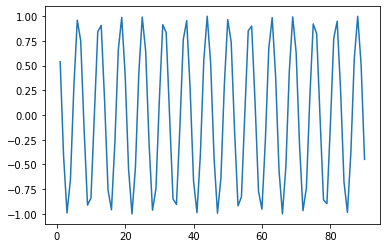

In [34]:
plt.plot(x,cosX)
plt.show

In [90]:
# 적절성과 만족도 칼럼 간의 상관관계
corrList = []
corr = lambda p : p['TARGET'].corr(p['GHI'])

def makeCorrList(df):
    result = corr(df)
    corrList.append(result)

for i in range(0,90):
    df['GHI'] = df['DNI']*math.cos(math.pi/180*i)+df['DHI']
    makeCorrList(df)

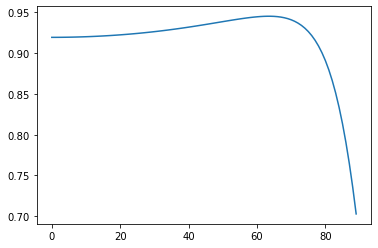

In [91]:
x = np.arange(0,90)
plt.plot(x,corrList)
plt.show()

In [89]:
# df['GHI'] = df['DNI']*math.cos(i)+df['DHI']
#     makeCorrList(df)

6.123233995736766e-17

In [83]:
max(corrList)

0.9451258195877116

In [85]:
count = 0
for i in range(len(corrList)):
    if corrList[i] > 0.94:
        count += 1
        print(i, corrList[i])

1 0.9431875465602463
20 0.9446574445242965
24 0.9449828497399354
43 0.9426209929844823
45 0.9437058321690478
64 0.9441178564590033
68 0.9451258195877116
87 0.9420153619535203
89 0.9441652275774125


9